# Imports

In [122]:
# Data Manipulation
import pandas as pd
import numpy as np
from io import StringIO

# Target Encoder
from sklearn.preprocessing import LabelEncoder
# Nominal Feature Encoder
from sklearn.preprocessing import OneHotEncoder

# Transformer
from sklearn.compose import ColumnTransformer

# Splitting Data
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression

# Data Visulization
import matplotlib.pyplot as plt

# Impute
from sklearn.impute import SimpleImputer

In [2]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

# Missing Data

## Finding number of missing data

In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## Dealing with missing values

### Removing training examples or features

In [6]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing missing values
- https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [11]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
imr_f = imr.fit(df)

In [13]:
imputed_df = imr_f.transform(df)
imputed_df

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [14]:
## Other method
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Handling categorical data

- Ordinal
- Nominal
    - Binary

### Ordinal

In [42]:
df1 = pd.DataFrame([['green', 'M', 10.1, 'class2'], ['red', 'L', 13.5, 'class1'], ['blue', 'XL', 15.3, 'class2']])

In [43]:
df1.columns = ['color', 'size', 'price', 'classlabel']

In [44]:
df1

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [45]:
# Ordinal features

size_mapping = {'XL': 3,
               'L':2,
               'M':1}

In [46]:
df1['size'] = df1['size'].map(size_mapping)
df1

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [47]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [48]:
df1['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding Class Labels

In [49]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [50]:
df1['classlabel'] = df1['classlabel'].map(class_mapping)
df1

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [51]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df1['classlabel'] = df1['classlabel'].map(inv_class_mapping)
df1

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [52]:
# Other way to do this
class_le = LabelEncoder()

In [56]:
df1['classlabel'] = class_le.fit_transform(df1['classlabel'])
df1

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [54]:
df1['classlabel'] = class_le.inverse_transform(df1['classlabel'])
df1

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [57]:
# I ran the label_encoder code again to get the below df1
df1

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


### Nominal (Using OneHotEncoder) 

In [29]:
color_ohe = OneHotEncoder()

In [61]:
X = df1[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [62]:
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [66]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [69]:
# other way 1
c_transf = ColumnTransformer([('color', OneHotEncoder(), [0]),
                             ('nothing', 'passthrough', [1, 2])])

In [70]:
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [77]:
# other way 2
pd.get_dummies(df1[['color','size','price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


# Partitioning a dataset into separate training and test datasets

In [79]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

In [92]:
df_wine = pd.read_csv(file, header=None)

In [94]:
df_wine.columns = ['Class label', 'Alcohol',
... 'Malic acid', 'Ash',
... 'Alcalinity of ash', 'Magnesium',
... 'Total phenols', 'Flavanoids',
... 'Nonflavanoid phenols',
... 'Proanthocyanins',
... 'Color intensity', 'Hue',
... 'OD280/OD315 of diluted wines',
... 'Proline']

In [96]:
df_wine['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [97]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [104]:
X = df_wine.drop(labels='Class label', axis=1)
y = df_wine['Class label']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Bringing features onto the same scale

In [107]:
mms = MinMaxScaler()

In [109]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [112]:
stdsc = StandardScaler()
# There is RobustScaler() also which can be used when the dataset is small and there are many outliers

In [111]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Feature Selection

### L1 and L2 Regularization

In [114]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')

In [115]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
print("Training Accuracy: ", lr.score(X_train_std, y_train))

Training Accuracy:  1.0


In [117]:
print("Test Accuracy: ", lr.score(X_test_std, y_test))

Test Accuracy:  1.0


In [118]:
lr.intercept_

array([-1.29288617, -1.15268014, -2.33270803])

In [119]:
lr.coef_

array([[ 1.59141698,  0.10991748,  0.66462338, -0.73593603,  0.        ,
         0.        ,  0.78994054,  0.        ,  0.        ,  0.        ,
         0.        ,  1.26703012,  2.30590542],
       [-1.52115227, -0.07187076, -1.11419567,  0.49789669,  0.        ,
         0.        ,  0.46782978,  0.36848781,  0.        , -2.00991125,
         1.45449926,  0.        , -1.86086451],
       [ 0.        ,  0.        ,  0.4261691 ,  0.        ,  0.1694172 ,
         0.        , -2.40775254,  0.        ,  0.        ,  1.60301898,
        -1.32917942, -0.17459848,  0.        ]])

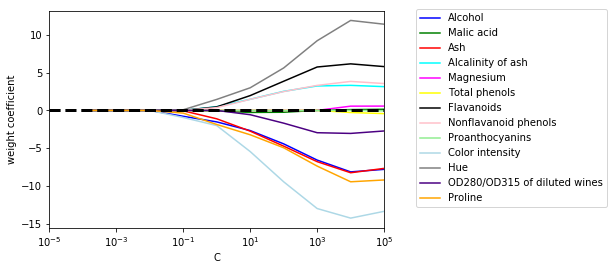

In [126]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c,
    solver='liblinear',
    multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column + 1],
    color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
    bbox_to_anchor=(1.38, 1.03),
    ncol=1, fancybox=True)
plt.show()

### Sequential feature selection algorithms
- There are two main categories of **dimensionality reduction** techniques: **feature selection** and **feature extraction**
- feature selection
    - sequential backward selection (SBS)
- greedy search algorithm and exhaustive search algorithm

In [127]:
# Implementing SBS

from sklearn.base import clone
from itertools import combinations
# import numpy as np # already imported above
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split # Already import above

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

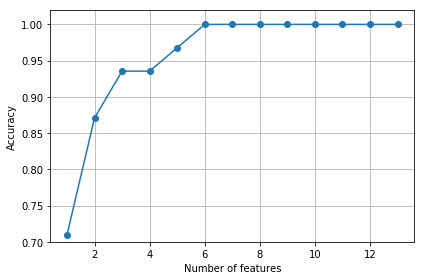

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

# feature selection algorithms
- http://scikit-learn.org/stable/modules/feature_selection.html
- http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

### Assessing feature importance with random forests

 1) Proline                        0.159025
 2) Flavanoids                     0.152663
 3) Color intensity                0.152075
 4) Alcohol                        0.126726
 5) OD280/OD315 of diluted wines   0.120410
 6) Hue                            0.078471
 7) Total phenols                  0.061839
 8) Malic acid                     0.036689
 9) Magnesium                      0.034401
10) Proanthocyanins                0.024389
11) Alcalinity of ash              0.022231
12) Nonflavanoid phenols           0.015958
13) Ash                            0.015121


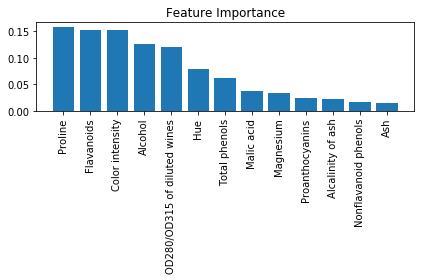

In [130]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [131]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [132]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.159025
 2) Flavanoids                     0.152663
 3) Color intensity                0.152075
 4) Alcohol                        0.126726
 5) OD280/OD315 of diluted wines   0.120410
